/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem



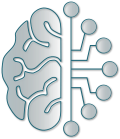

**Start at:** Tuesday 01 October 2024, 13:17:23  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [3]:
#########################################################################################################################################################
# exécutez cette première cellule Python, qui définit le style visuel de ces notebooks et qui initialise quelques variables et fonctions parfois utiles #
#########################################################################################################################################################

import os
import sys

# commenter les lignes ci-dessous si vous n'exécutez pas le notebook dans l'environnement pyPhysChem
print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

__author__ = "romuald.poteau@univ-tlse3.fr"
__version__ = "20241001"

# Chimie Théorique et Modélisation : modèles simples<br>Feuilles de calcul Python

## À qui ce notebook est-il destiné et comment travailler avec ?

<div class="intro">

Ce notebook Python est destiné à tou(te)s les étudiant(e)s qui suivent un enseignement d'introduction à l'"atomistique et la liaison chimique", qu'on préfère intituler les **modèles simples en chimie théorique et modélisation**. 

**Vous pensez qu'avoir des compétences en Python est sans intérêt pour vous ?** C'est une **erreur**, Python étant ***a minima* une super calculatrice scientifique**. 
Acquérir une maîtrise de Python représente un avantage incontournable pour tout(e) étudiant(e) en sciences, en lui fournissant les **compétences techniques** indispensables pour stimuler la réflexion et l'innovation dans son domaine scientifique. Mais maîtriser Python ne se limite pas à développer des compétences techniques, cela peut vous permettre également de **mieux comprendre un domaine** en approfondissant l'analyse des données, en explorant de **nouvelles approches méthodologiques et numériques**, et en **visualisant des phénomènes complexes** sous des angles inédits. Bref, ça peut vous **aider à comprendre** et à **vous poser des questions différemment**.

Tout(e) étudiant(e) curieux(se) peut s'approprier toutes les parties du notebook. Néanmoins, voici comment vous pourriez **sélectionner les parties qui sont les plus adaptées à votre parcours**, selon que vous êtes dans un parcours...

- **chimie** ou **physico-chimie** : concentrez-vous avant tout sur les applications numériques, sur les outils de résolution numériques d'équations, sur les graphiques, sur l'utilisation de "macrocommandes" en sachant lire "la doc" pour appeler la commande avec les bons paramètres
- **informatique** : Développer du code sans comprendre le contexte utilisateur est insuffisant. Au-delà de cette première approche, des fonctions et classes Python sont intégrées au notebook, afin de faciliter l'utlisation de certaines bibliothèques ou de dépasser leurs limites. Analysez le code, qui exploite le caractère orienté objet du langage Python, et qui - modestement - essaie d'automatiser des processus et de créer des applications logicielles performantes. Et ne passez pas à côté des applications numériques, pour vous aider à aborder différemment le domaine de la chimie. 
- **mathématiques** : les parties exploitant `sympy`, bibliothèque qui facilite le calcul symbolique, sont faites pour vous. Ne négligez cependant pas les parties  numériques ni la partie analyse du code Python si vous êtes attiré(e) par les mathématiques appliquées.
- **physique** : simuler et comprendre des phénomènes physiques nécessitant entre autres de résoudre des équations complexes et d'analyser des données expérimentales, vous pouvez essayer de vous approprier l'ensemble des exercices
- **sciences de l'ingénieur ou prépa concours** : vous serez régulièrement confrontés à la nécécessité de résoudre de façon optimale des problèmes complexes, d'automatiser des calculs et d'analyser des données dans divers domaines de l'ingénierie. Avoir des compétences numériques, en programmation, et en manipulation des données est incontournable. Des compétences en calcul symbolique (bibliothèque `sympy`) sont un plus.

<div style="color:#4a7d93">
    
**Les compétences Python travaillées seront précisées en fin de chaque exercice.**

</div>

Dans l'environnement `pyPhysChem` &ndash; <u>c'est-à-dire si vous clonez l'espace de dépôt sur votre ordinateur, ce qui est fortement recommandé </u> &ndash; les exercices apparaissent sur fond bleu, comme dans l'exemple ci-dessous
</div>
<br>
<div class="ex" title="lorem ipsum">

*Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Maecenas porttitor congue massa. Fusce posuere, magna sed pulvinar ultricies, purus lectus malesuada libero, sit amet commodo magna eros quis urna. Nunc viverra imperdiet enim. Fusce est. Vivamus a tellus. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Proin pharetra nonummy pede. Mauris et orci. Aenean nec lorem. In porttitor. Donec laoreet nonummy augue. Suspendisse dui purus, scelerisque at, vulputate vitae, pretium mattis, nunc. Mauris eget neque at sem venenatis eleifend. Ut nonummy.*

Mais d'où sort cette phrase ?

<div style="color:#4a7d93">

**Compétence travaillée :** rechercher l'origine du *lorem ipsum* et quelle est son utilisation dans le monde numérique.
</div>
</div>

## Importation des constantes fondamentales

### Introduction

<div class="intro">

En chimie, on a fréquemment besoin d'utiliser des [constantes physiques](https://en.wikipedia.org/wiki/Physical_constant), telles que la vitesse de la lumière $c$, la masse du proton $m_p$, le nombre d'Avogadro $N_A$, la constante de Planck $h$, la constante des gaz parfaits $R$, etc...

Une constante physique est une quantité physique dont la valeur numérique est fixe. Contrairement à une constante mathématique, elle implique une grandeur physiquement mesurable.

On a souvent besoin également de certaines [constantes mathématiques](https://en.wikipedia.org/wiki/Mathematical_constant), comme le nombre $\pi$, le nombre d'Euler $e$, l'unité imaginaire $i$, etc...

La plupart de ces constantes sont disponibles dans la bibliothèque `SciPy`, qui est l’une des bibliothèques de Python permettant de faire le calcul scientifique. Celle-ci dépend de la bibliothèque `NumPy` qui permet la manipulation des tableaux à *N* dimensions. La liste des constantes et des unités est disponible dans la [documentation en ligne de](https://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants) `SciPy`, ou bien par l'utilisation d'une commande Python. Pour y accéder, il faut importer `scipy.constants`.

</div>
<br>
<div class="rqT" title="SciPy ? A quoi ça sert ?">

`SciPy` est une bibliothèque open-source en Python utilisée pour les calculs scientifiques et techniques. Elle fournit des outils pour l'optimisation, l'intégration, l'interpolation, l'algèbre linéaire, les statistiques, et d'autres domaines des mathématiques appliquées. Voir l'article de [wikipedia](https://fr.wikipedia.org/wiki/SciPy) et le [site du projet](https://scipy.org/). **Elle est utile dans <u>tous</u> les domaines scientifiques**.
</div>
<br>
<div class="intro">

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées dans cette section**:</u>

- importer des bibliothèques existantes et exploiter les fonctions incluses
- faire appel au *i*ème élément (`[i]`) d'une liste, d'un multiplet, ou d'un tableau
- afficher le contenu d'une variable à l'aide de la commande `print`
- lire une documentation en ligne en anglais
</div></div>

In [ ]:
import scipy.constants as sc

### Valeur, unité et précision d'une constante fondamentale

<div class="intro">
    
Prenons l'exemple de la masse de l'électron, dont on lit dans la  [documentation en ligne de](https://docs.scipy.org/doc/scipy/reference/constants.html) `SciPy`, que la clef qui indexe $m_e$ est `electron mass`. On va afficher sa valeur, son unité, et l'incertitude *absolue* de cette constante, renvoyées sous forme de multiplet (*tuple* en anglais) de 3 valeurs.
</div>

In [ ]:
print(sc.physical_constants["electron mass"])

<div class="intro">

Dans un premier temps, on va se contenter de stocker la constante dans une variable.
</div>

In [ ]:
me = sc.physical_constants["electron mass"][0]
print(me)

<div class="intro">

**Un mot sur l'incertitude du module `physical_constants` de `SciPy`.** C'est une incertitude absolue qui est contenue dans le 3ème terme du multiplet. Pour rappel, on écrit la valeur d'une mesure avec son incertitude absolue selon la relation :
    
$$m_{\mathrm{e}}\pm\Delta m_{\mathrm{e}}$$

ce qui veut dire que $m_{\mathrm{e}}$ est en réalité compris entre deux valeurs $m_{\mathrm{e}} - \Delta m_{\mathrm{e}}$ et $m_{\mathrm{e}} + \Delta m_{\mathrm{e}}$ :
</div>

<div class="intro">
</div>

In [ ]:
me_p = sc.physical_constants["electron mass"][2]
me_u = sc.physical_constants["electron mass"][1]
print("Masse de l'électron = ",me,"±",me_p,me_u)

### Affichage des constantes puis importation de leurs valeurs dans des variables

In [ ]:
print(f'Constante de Planck, h: {sc.physical_constants["Planck constant"]}')
print()
print(f'Charge élémentaire, e: {sc.physical_constants["elementary charge"]}')
print()
print(f'Vitesse de la lumière dans la vide, c: {sc.physical_constants["speed of light in vacuum"]}')
print()
print(f'Masse de l\'électron, me: {sc.physical_constants["electron mass"]}')
print()
print(f'Masse du proton, mp: {sc.physical_constants["proton mass"]}')
print()
print(f'Masse du neutron, mn: {sc.physical_constants["neutron mass"]}')


In [ ]:
h = sc.physical_constants["Planck constant"][0]
e = sc.physical_constants["elementary charge"][0]
c = sc.physical_constants["speed of light in vacuum"][0]
me = sc.physical_constants["electron mass"][0]
mp = sc.physical_constants["proton mass"][0]
mn = sc.physical_constants["neutron mass"][0]

<div class="ex" title="Nombre d'Avogadro">

**1.** Afficher la valeur du nombre d'Avogadro, son incertitude et son unité, qui sont disponibles dans la bibliothèque `SciPy`

**2.** Sauver la valeur du nombre d'Avogadro dans une variable `NA`, <u>sans utiliser un copier-coller</u>

**3.** Afficher le contenu de la variable `NA` en écrivant : Nombre d'Avogadro = *valeur unité*

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- lire une documentation en ligne en anglais (la [liste des constantes physiques de `SciPy`](https://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants))
- importer des bibliothèques existantes et exploiter les fonctions incluses
- sauver une valeur numérique dans une variable
- afficher le contenu d'une variable, en contextualisant
</div>
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2

#Q3


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/Avogadro.py

## Quelques rappels mathématiques importants

### Chiffres significatifs

<div class="intro">

Reprenons l'introduction de l'[article de wikipedia](https://fr.wikipedia.org/wiki/Chiffre_significatif) à ce sujet : *le nombre de chiffres significatifs indique la précision d'une mesure physique. Il s'agit des chiffres connus avec certitude ou compris dans un intervalle d'incertitude. La précision (ou l'incertitude) avec laquelle on connaît la valeur d'une grandeur dépend de la mesure, c'est-à-dire de l'ensemble d'opérations ayant pour but de déterminer la valeur d'une grandeur.*

*<u>Exemple</u> : 12 345 a cinq chiffres significatifs. Son premier chiffre incertain est le 5. Cet exemple est équivalent à 12 345 ± 1 ou encore 12 345(1)*

<u>Exemple</u>  : *m* = 100,0016 g avec une incertitude de 0,0011 g = 100,0016(11) g = 100,0016 ± 0,0011 g
</div>

<div class="intro">
    
Il existe une bibliothèque Python, `sigfig` qui peut assister le scientifique dans **l'affichage** des variables avec un nombre de chiffres significatifs défini par l'utilisateur. La fonction qui nous intéresse s'appelle `round`, dont des exemples sont donnés ci-dessous.
</div>
<br>
<div class="rq">
    
`sigfig` n'étant pas fourni avec une distribution Python standard, il faut d'abord l'installer, par exemple avec la commande `pip`, qu'on peut lancer directement depuis le notebook.
</div>

In [ ]:
# enlever le commentaire de la ligne ci-dessous si votre distribution Python n'intègre pas sigfig
# à faire une fois seulement, l'installation est définitive 
#!pip install sigfig 

In [ ]:
from sigfig import round
print(round(me,me_p))
print(round(me,me_p,format='Drake'))
print()
print(round(me,me_p,notation='scientific'))

<div class="rq">

    
- `sigfig` ne permet malheureusement pas de combiner le format Drake et la notation scientfique
- pour définir le nombre de décimales, on peut utliiser fonction `round` de `NumPy` ou bien celle de `sigfig` avec l'option `decimals` :

```Python
import numpy as np
np.round(12.542352,2) #arrondit à deux décimales = 12.54
```
<br>

```Python
from sigfig import round
round(12.542352,decimals = 2) #arrondit à deux décimales = 12.54
```

</div>

<div class="ex" title="Chiffres significatifs">

**1.** Écrire les nombres A ci-dessous  avec le même nombre de chiffres significatifs que le nombre B qui lui est associé

- A = 12,876782320 ; B = 3,1416
- A = 125678,000034 ; B = 0,000056

**2.** Exprimer chaque nombre ci-dessous en tenant compte du nombre de chiffres significatifs (cs) demandé

- 0,006738 ; 3 cs
- 43,715 &times;  10<sup>3</sup> ; 4 cs (utiliser la notation scientifique)

**3.** Effectuez les opérations suivantes en tenant compte des chiffres significatifs. Ne pas oublier d'afficher l'unité !

- 1,20 x 10<sup>2</sup> V x 2,5 A
- 0,288 g / 0,4 cm<sup>3</sup>
- 10,8 g + 0,125 g + 4,25 g
- 1,5 x 10<sup>3</sup> mL - 3 x 10<sup>2</sup> mL

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- installer une bibliothèque Python afin d'ajouter des fonctionnalités à sa distribution de base
- importer des bibliothèques existantes et exploiter les fonctions incluses
</div>
</div>
<br>
<div class="hint">

Rappels concernant les chiffres significatifs : 
- multiplications et divisions : c’est toujours "le plus petit qui l’emporte"
- additions et soustractions :  le résultat ne doit pas avoir plus de décimales que le nombre qui en comporte le moins (1,07 + 16,0 = 17,07 → 17,1)
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2

#Q3


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/cs.py

### développement en cours (à suivre...)

## Chapitre 1 : Pré-requis et généralités

### Isotopes et abondance natutelle

#### Résolutions numériques

<div class="ex" title="Masse molaire du lithium naturel">

Selon les tables de données atomiques, il existe 5 isotopes du lithium :

| isotope | *M* / g.mol<sup>-1</sup> | *t*<sub>1/2</sub> / s |
|:-------------:|:-------------|:-------------:|
|<sup>6</sup>Li|	6,015 122 3(5)|stable|
|<sup>7</sup>Li|	7,016 004 0(5)|stable|
|<sup>8</sup>Li|	8,022486|0,84|
|<sup>9</sup>Li|	9,026789|0,178|
|<sup>11</sup>Li|11,04379|0,0087|

Or, le spectre de masse du lithium naturel, ci-dessous, ne présente que deux pics :

<img src="MiscImages/Exercises/spectreMasse-Li.png" style="margin-left:auto; margin-right:auto; display: block; width:200px" id="img_massSpLi" alt="spectre de masse de Li"/>

**1.** Quelle est la masse molaire du lithium à l'état naturel ?

**2.** Afficher le résultat avec le nombre de chiffres significatifs approprié, ainsi qu'avec l'unité

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions incluses
</div></div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2

<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/MMLi.py

<div class="ex" title="Abondance naturelle des isotopes de l'élément bore">
Le bore naturel (Z=5) est constitué de 2 isotopes : <sup>10</sup>B et <sup>11</sup>B  dont les masses molaires sont respectivement égales à M<sub>1</sub> = 10,0129 g.mol<sup>-1</sup> et M<sub>2</sub> = 11,0093 g.mol<sup>-1</sup>.
    
**1.** Sachant que la masse molaire du bore naturel est M = 10,8110 g.mol<sup>-1</sup>, quelles sont les proportions relatives de ces deux isotopes dans le bore naturel, que l'on notera p<sub>1</sub> et p<sub>2</sub> ?

**2.** Ecrire p<sub>1</sub> et p<sub>2</sub> avec le nombre de chiffres significatifs approprié. On utilisera pour cela la fonction `round` de la [bibliothèque `sigfig`](https://pypi.org/project/sigfig/)

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions incluses
- appliquer des méthodes numériques pour résoudre un système d'équations
</div>
</div>
<br>

<div class="hint">

- on recherche deux inconnues, p1 et p2. Il faut formuler un système de deux équations à deux inconnues. Dans ce cas, le système s'exprime comme :
$$p_1M_1 + p_2M_2 = M$$
$$p_1 + p_2 = 1$$

- puis il faut résoudre le système. On va utiliser la fonction `solve` fournie par le module `linalg` de `numpy`. Il faut d'abord transformer le système ci-dessus en tableaux
    - le premier va contenir les valeurs associées aux inconnues *p*<sub>1</sub> et *p*<sub>2</sub> dans la partie gauche de ces deux équations
$$A=\left[\begin{array}{cc}
M_{1} & M_{2}\\
1 & 1
\end{array}\right]$$
    - le second va contenir les valeurs de la partie droite des équations
$$y=\left[\begin{array}{c}
M\\
1
\end{array}\right]$$

Ces deux tableaux doivent être exprimés sous forme de tableaux `numpy` :

```python
A = np.array([
             [M1,M2],
             [1,1]
             ])
y = np.array([M,1])
```

Puis on peut faire appel à `solve` :
```
np.linalg.solve(A, y)
```

- on sauvera la solution dans 2 variables `p1` et `p2`, ce qui facilitera la gestion par `sigfig`, qui ne sait travailler ni sur des tableaux ni sur des listes
</div>

<div class="rq">

C'est à vous de gérer la précision, c'est-à-dire le nombre de chiffres significatifs, compte tenu de la précision des données. La bibliothèque `sigfig` peut ensuite être utilisée pour vous aider à afficher les abondances naturelles avec le nombre de chiffres significatifs approprié, c'est-à-dire 6 dans cette application. 
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/isotopesB.py

#### Résolution analytique

<div class="intro">
    
On va utiliser un programme CAS (Computer Algebra System), c'est-à-dire un logiciel utilisé pour effectuer des calculs algébriques symboliques, comme la manipulation d'expressions mathématiques, la résolution d'équations, et le calcul de dérivées et d'intégrales, de manière exacte plutôt que numérique.

On va plus précisément utiliser pour cela la [bibliothèque Python `SymPy`](https://www.sympy.org/). Elle permet de manipuler des expressions mathématiques sous forme symbolique plutôt que numérique. Les outils d'algèbre symbolique sont particulièrement utiles dans le contexte de l'enseignement, de la recherche, ou du développement d'outils mathématiques où il est nécessaire de manipuler des expressions mathématiques de manière exacte, plutôt que d'avoir recours à des approximations numériques.

Ce sont des compétences Python qu'il est utile de maîtriser en mathématiques, physique, sciences de l'ingénieur. Rien n'interdit aux chimistes et physico-chimistes d'essayer de comprendre ce qui va être fait.
</div>
<br>
<div class="intro">

**Mode d'emploi :**
    
- si `SymPy` n'est pas encore installé, vous pouvez l'ajouter en exécutant la commande suivante dans une cellule du notebook :  `!pip install sympy`
- vous devez importer la bibliothèque. Pourquoi ne pas lui attribuer un raccourci : `import sympy as sym`

Supposons que vous devez résoudre le système suivant

$$\begin{align*}
2x + 3y &= 6 \\
x - y &= 2
\end{align*}$$

- il vous faut d'abord déclarer les variables symboliques, qui sont ici *x* et *y*

    ```python
    from sympy import symbols
    x, y = symbols('x y')
    ```

- vous pouvez ensuite définir vos équations, avec la fonction `Eq()` de `SymPy`. Par exemple, `Eq(2*x + 3*y, 6)` représente l'équation $2x+3y=6$ 

    ```python
    from sympy import Eq
    eq1 = Eq(2*x + 3*y, 6)
    eq2 = Eq(x - y, 2)
    ```

- utilisez la fonction `solve` de SymPy pour résoudre le système d'équations. Sa syntaxe générale est `solve(equations, variables)`. `equations` peut être une seule équation ou un tuple de plusieurs équations. Idem pour `variables`. Dans ce cas, ça donne

    ```python
    from sympy import solve
    solution = solve((eq1, eq2), (x, y))
    ```

- `solve` retourne un dictionnaire avec les solutions des variables

Voici ce que ça donne :
</div>

In [ ]:
# enlever le commentaire ci-dessous si la bibliothèque sympy n'est pas installée sur votre distribution, ce qui est probable
# à faire une fois seulement, l'installation est définitive 
# !pip install sympy

In [ ]:
from sympy import symbols
x, y = symbols('x y')

from sympy import Eq
eq1 = Eq(2*x + 3*y, 6)
eq2 = Eq(x - y, 2)

from sympy import solve
solution = solve((eq1, eq2), (x, y))

print(solution)

<div class="ex" title="Abondance isotopique">

Utiliser la fonction `solve` de `SymPy` pour résoudre l'exercice "*Abondance naturelle des isotopes de l'élément bore*".

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- installer une bibliothèque Python afin d'ajouter des fonctionnalités à sa distribution de base
- importer des bibliothèques existantes et exploiter les fonctions incluses
- appliquer des méthodes symboliques pour résoudre un système d'équations
</div>
</div>
<br>
<div class="hint">

Pour faire l'application numérique, vous devrez utiliser la fonction `subs` de `SymPy`. Elle permet en effet de remplacer une variable symbolique par une valeur numérique. Voici un exemple d'application :

```python
x = symbols('x')
y = symbols('y')
expr = x**2 + y**2
expr_ = expr.subs({x: 1, y: 2})
print(expr_)
```

La commande print va afficher 5.
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/isotopesB_sympy.py

## Chapitre 3 : Atomes et orbitales atomiques (OA)

### Atome d'hydrogène

<div class="ex" title="Atome d'hydrogène : niveaux d'énergie">

On rappelle que *Z*=1 et *A*=1 pour H et que l'énergie électronique est donnée par la formule :

$$E_{n}(\mathrm{H})=-\frac{E_{i_{1}}(\mathrm{H})}{n^{2}}$$

où *n* est le nombre quantique principal et où $E_{i_{1}}(\mathrm{H})$, l'énergie d'ionisation de H, vaut 13,598 eV.

$E_{i_{1}}(\mathrm{H})$ peut être calculée en appliquant la formule ci-dessous

$$E_{i_{1}}=\frac{1}{8}\frac{\mu_{\mathrm{H}}e^{4}}{\left(h\times\varepsilon_{0}\right)^{2}}$$

où : 
- *h* est la constante de Planck
- $\varepsilon_{0}$ ("epsilon zéro") est la permittivité du vide ou encore la constante (di)électrique
- *e* est la charge élémentaire
- $\mu_{\mathrm{H}}$ est la masse réduite de <u>un</u> atome d'hydrogène, calculée par la formule :

$$\mu_{\mathrm{H}}=\frac{m_{e}m_{p}}{m_{e}+m_{p}}$$

**1.** Afficher les constantes fondamentales *h*, $\varepsilon_{0}$, $m_{e}$, $m_{p}$ et *e* de la bibliothèque `scipy`, leur précision et leur incertitude absolue. Puis sauver leurs valeurs dans des variables `h`, `eps0`, `me`, `mp`, `e`.

**2.** Utiliser ces variables pour retrouver la valeur de l'énergie d'ionisation de H en eV.

**3.** Calculer, en eV, les énergies des 10 premiers états de l'atome d'hydrogène. Utiliser la fonction `round(x,m)` de `numpy` pour arrondir les énergies à 3 décimales (`m`=3)

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données

</div>
</div>
<br>
<div class="hint">

- la constante électrique du vide $\varepsilon_{0}$ est indexée dans `scipy` sous le nom de `vacuum electric permittivity`
- calculer d'abord $\mu_{\mathrm{H}}$ et sauver la valeur dans une variable `muH`
- utiliser la grandeur physique appropriée de `scipy` pour faire la conversion de joule en eV
- utiliser une boucle pour répondre à la question 2
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2

#Q3


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/H_En.py

<div class="ex" title="Atome d'hydrogène : transitions électroniques">

La relation de Planck-Einstein est une relation de base de la mécanique quantique. Elle permet de calculer l'énergie transportée par un photon : $E=h\nu$, où :

- E est l'énergie du photon (en joules)
- h est la constante de Planck (en J⋅s)
- $\nu$ ("nu") est la fréquence (en hertz) de l'onde électromagnétique associée au photon considéré

Dans le cas d'une onde électromagnétique se propageant dans le vide, fréquence $\nu$ ("nu") et longueur d'onde $\lambda$ ("lambda", en mètres) sont liées par la relation $\nu = c/\lambda$ 

La relation de Planck-Einstein s'écrit alors

$$E=\frac{hc}{\lambda}$$

c'est-à-dire que connaissant l'énergie d'un photon on peut calculer sa longueur d'onde par

$$\lambda=\frac{hc}{E}$$

On trouve dans certains formulaires de calcul qu'on peut directement calculer la longueur d'onde en nm, à partir d'une énergie exprimée en eV :

$$\lambda[\mathrm{nm}]=\frac{1239,84}{E[\mathrm{eV}]}$$

**1.** Retrouver la valeur au numérateur, et la sauver dans une variable `eV2nm` ("eV to nanometers")

**2.** La transition la plus intense du spectre d'émission de l'atome d'hydrogène correspond à la transition 3 &rarr; 2. Calculer, en eV, la différence d'énergie entre les deux états. En déduire la longueur d'onde en nm. Les afficher avec 3 & 1 décimale, respectivement.

**3.** La série de Balmer est la série de raies spectrales de l'atome d'hydrogène correspondant à une transition électronique d'un état quantique de nombre principal *n* &ge; 3 vers l'état *n* = 2. Calculer, en nm, les longueurs d'onde des 6 premières transitions de la série de Balmer, et les afficher avec 1 décimale.

**4.** Faire le même travail pour les séries de Lyman (transitions *n* &ge; 2 vers l'état *n* = 1) et de Brackett (transitions de *n* &ge; 4 vers l'état *n* = 1). Ces raies sont-elles identifiables par un oeil humain ?

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données

</div>
</div>
<br>
<div class="hint">

- question 1
    - utiliser à nouveau les constantes fondamentales appropriées de l'exercice précédent, et les compléter si nécessaire
    - 1 nm = 10<sup>-9</sup> m = `1e-9` m
    - &lambda;[m] = &lambda;[nm] &times; `1e9`
    - *E*[J]/*e* = *E*[eV]
- question 2
    - utiliser la valeur de $E_{i_{1}}(\mathrm{H})$ calculée précédemment
    - la relation $\lambda[\mathrm{nm}]={1239,84}/{E[\mathrm{eV}]}$ peut s'appliquer à des différences d'énergie
- question 3
    - définir une fonction `E(n)`, qui renvoie, en eV, l'énergie d'un état quantique de nombre principal *n*
    - utiliser une boucle
    - utiliser la fonction `round` de `numpy`


</div>
<br>
<div class="rq">

!! `lambda` est une fonction de `Python`. Ne pas l'utiliser comme variable !!
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2

#Q3

#Q4


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/H_Tn.py

### Configurations électroniques fondamentales

<div class="intro">

On va utiliser la bibliothèque Python `mendeleev`, qui est un outil conçu pour fournir un accès facile aux données du tableau périodique des éléments et à diverses propriétés atomiques. Elle est nommée en l'honneur de [Dmitri Mendeleïev](https://fr.wikipedia.org/wiki/Dmitri_Mendele%C3%AFev), le chimiste russe qui a créé le premier tableau périodique.

Pour récupérer les informations d'un élément, il faut

- commencer par importer le module `element` de la bibliothèque `mendeleev`
- puis dire quel est l'élément dont on veut connaître les propriétés, en le désignant par son symbole chimique (attention au respect majuscule/minuscule) ou par son numéro atomique, ou par son nom anglais

```Python
from mendeleev import element

chlore = element('Cl')
hydrogène = element(1)
carbone = element('Carbon')
```
<br>

On peut ensuite accéder aux propriétés... si on connaît leur nom. Les données disponibles et leur origine sont indiquées sur la [page data de la documentation](https://mendeleev.readthedocs.io/en/stable/data.html).

Par exemple,

```Python
chlore.econf
```
renvoie la configuration électronique du chlore. On peut aussi l'obtenir directement avec la commande 

```Python
element('Cl').econf
```

</div>
<br>
<div class="rq">

**C'est quoi cette commande `chlore.econf` ? Pourquoi pas `econf(chlore)`?**

c'est lié au fait que Python obéit au principe de la programmation orientée objet. `econf` est un **attribut** de l'objet `chlore`.  Les objets ont des attributs, qui sont des variables associées à l'objet et qui contiennent des données. Dans le plupart des bibliothèques Python, il existe également des fonctions qui s'appliquent aux objets. Supposons qu'il existe une fonction, `cloud`, qui renvoie de quoi dessiner le nuage électronique d'un atome. On l'appelerait comme `chlore.cloud()`. *Notez les parenthèses.* Supposons que cette fonction dessine par défaut le nuage électronique total, mais qu'elle puisse prendre en paramètre le numéro de la couche pour dessiner le nuage électronique restreint à ces électrons-là. On écrirait par exemple, pour la 2ème couche, `chlore.cloud(2)`.
</div>
<br>
<div class="intro">

**Principales commandes**

- `element(X).ec` (*attribut*) : renvoie la CEF complète de l'élément identifié par X, où X = Z ou "symbole atomique" ou "name of the element" 
- `element(X).econf` (*attribut*) : renvoie la CEF de l'élément identifié par X, exprimée à partir de celle du gaz noble de la période précédente . Bizarrement, 1 n'est jamais indiqué quand une sous-couche est occupée par un seul électron. 
- `element(X).ec.unpaired_electrons()` (*fonction*) : calcule et renvoie le nombre d'électrons célibataires de X
- `element(X).ec.ionize(n)` (*fonction*) : renvoie la CEF du cation X^(n+)
- `element(X).oxistates` (*attribut*) : renvoie les états d'oxydation <u>les plus courants</u> de l'élément X
</div>

In [ ]:
# enlever le commentaire de la ligne ci-dessous si votre distribution Python n'intègre pas mendeleev, ce qui est le plus probable
# à faire une fois seulement, l'installation est définitive 
# !pip install mendeleev 

In [ ]:
from mendeleev import element
Cu = element(29)
print("CEF de Cu =",Cu.ec,"=",Cu.econf)
print("Nombre d'électrons célibataires de Cu =",Cu.ec.unpaired_electrons())
print("État(s) d'oxydation le(s) plus courant(s) de Cu =",Cu.oxistates)
print("CEF de Cu2+ =",element(29).ec.ionize(2))
print("Nombre d'électrons célibataires de Cu2+ =",Cu.ec.ionize(2).unpaired_electrons())

<div class="ex" title="CEF des éléments. Métaux de transition">

**1.** Utiliser les données de la bibliothèque `mendeleev` pour afficher la configuration électronique fondamentale (CEF) des éléments ci-dessous, ainsi que leur nombre d'électrons non célibataire. Afficher également le numéro atomique, contenu dans la variable (ou attribut) `atomic_number`, utilisée à la place de `ec` ou de `econf`.

- l'aluminium (Al)
- le calcium (Ca)
- le scandium (Sc)
- le chrome (Cr)

**2.** Afficher les états d'oxydation les plus courants de l'or (Au). En déduire que Au est bien un métal de transition. 

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses

</div>
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/CEF_MT.py

<div class="rq">

Il est utile de rappeler la définition d'un métal de transition : **Un métal de transition, ou élément de transition, est, selon la définition de l'IUPAC, « un élément chimique dont les atomes ont une sous-couche électronique d incomplète, ou qui peuvent former des cations dont la sous-couche électronique d est incomplète**. [L'article de wikipedia sur le sujet est très bien écrit](https://fr.wikipedia.org/wiki/M%C3%A9tal_de_transition). 

La sous-couche *d* de Au est complète (5*d*<sup>10</sup>), mais Au est bien un métal de transition, puisque Au<sup>3+</sup>, cation connu (donc stable) de Au, possède une sous-couche *d* incomplète (5*d*<sup>8</sup>).
</div>

## Chapitre 4 : le tableau périodique des éléments

<div class="intro">

On va principalement utiliser la bibliothèque `mendeleev`, et le tableau de données qui est renvoyé par la fonction `create_vis_dataframe()` du package `mendeleev.vis`. Ce tableau contient numéros atomiques, noms des éléments en anglais, noms des familles en anglais, rayons covalents, affinité électronique etc... Il peut ensuite être **utilisé pour dessiner des tableaux périodiques**, par exemple avec `matplotlib`. Mais il y **manque des données** comme les noms en français, les énergies de première ionisation (pourtant disponibles dans la base de données de `mendeleev`) etc. Si on veut franciser `mendeleev` et y transférer certaines données physico-chimique de sa base de données vers ce tableau, il va donc falloir le *patcher*.

Pour simplifier la vie de l'utilisateur, `mendeleev` met à disposition des commandes graphiques pour **visualiser le tableau périodique**. L'une d'entre elles s'appuie sur la bibliothèque **`bokeh`**, qui permet de générer des **visualisations web interactives** directement depuis du code Python. Ca marche aussi dans un environnement de jupyter notebook. `bokeh` ne faisant en général pas partie de la distribution standard, il faut **l'installer à la première utilisation**.

On aimerait de surcroît, pour chaque élément, connaître sa "carte de visite", comme la date de découverte, l'origine du nom, l'utilisation principale etc. Toutes ces données sont contenues dans la base de données de `mendeleev`, mais il faut une commande Python pour afficher chacune de ces informations.
</div>

### Développements d'outils Python

<div class="intro">

L'exercice ci-dessous consiste à analyser un code Python qui a été développé à la fois pour simplifier l'utilisation de `mendeleev` et pour le *patcher*, selon les orientations définies dans l'introduction ci-dessus. 

</div>

<div class="ex" title="Construction d'une classe Python">

Cet exercice s'adresse aux étudiants en informatique et plus généralement à tous ceux et toutes celles d'entre vous qui veulent acquérir la compétence *développement d'outils dans un langage orienté objet*, tel que Python.

On a construit une classe `TableauPeriodique` afin d'amender `mendeleev`:

- avec une partie *pach*  pour ajouter les noms en français, ajouter les énergies d'ionisation dans le tableau qui permet de dessiner le tableau périodique, changer les informations interactives qui se superposent au tableau quand on passe la souris dessus, changer les éléments du groupe 12 en métaux alors que `mendeleev` les classe comme des métaux de transition, etc...
- avec l'introduction d'une nouvelle commande `prop()`

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- maîtriser la syntaxe et la sémantique de Python afin d'écrire des programmes fonctionnels
- installer une bibliothèque si elle ne fait pas partie de votre environnement Python de base
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données
- créer des fonctions spécifiques utilisant les fonctions et les classes élémentaires génériques fournies par le langage
- connaître les grands principes de la programmation orientée objet (encapsulation, héritage ...) et les notions associées (constructeur, attributs, méthodes ...) en vue de les mettre en oeuvre en Python afin d'écrire des programmes modulaires et évolutifs
- définir ses propres classes d'objet en vue de créer des objets correspondants parfaitement aux données manipulées
- documenter une classe et ses méthodes en vue d'améliorer sa qualité et sa ré-utilisabiilité

</div>
</div>

In [ ]:
# enlever le commentaire de la ligne ci-dessous si votre distribution Python n'intègre pas bokeh (Anaconda l'intègre par défaut)
# à faire une fois seulement, l'installation est définitive 
# !pip install bokeh

In [ ]:
# enlever le commentaire de la ligne ci-dessous si votre distribution Python n'intègre pas mendeleev, ce qui est le plus probable
# ... et si vous ne l'avez pas déjà installé dans un exercice précédent
# !pip install mendeleev 

In [ ]:
class TableauPeriodique:
    nomsFr=['Hydrogène','Hélium','Lithium','Béryllium','Bore','Carbone','Azote','Oxygène',
            'Fluor','Néon','Sodium','Magnésium','Aluminium','Silicium','Phosphore','Soufre',
            'Chlore','Argon','Potassium','Calcium','Scandium','Titane','Vanadium','Chrome',
            'Manganèse','Fer','Cobalt','Nickel','Cuivre','Zinc','Gallium','Germanium',
            'Arsenic','Sélénium','Brome','Krypton','Rubidium','Strontium','Yttrium',
            'Zirconium','Niobium','Molybdène','Technétium','Ruthénium','Rhodium',
            'Palladium','Argent','Cadmium','Indium',
            'Étain','Antimoine','Tellure','Iode','Xénon','Césium','Baryum','Lanthane','Cérium',
            'Praséodyme','Néodyme','Prométhium','Samarium','Europium','Gadolinium','Terbium',
            'Dysprosium','Holmium','Erbium','Thulium','Ytterbium','Lutetium','Hafnium','Tantale',
            'Tungstène','Rhénium','Osmium','Iridium','Platine','Or','Mercure','Thallium','Plomb',
            'Bismuth','Polonium','Astate','Radon','Francium','Radium','Actinium','Thorium','Protactinium',
            'Uranium','Neptunium','Plutonium','Americium','Curium','Berkelium','Californium','Einsteinium',
            'Fermium','Mendelevium','Nobelium','Lawrencium','Rutherfordium','Dubnium','Seaborgium','Bohrium',
            'Hassium','Meitnerium','Darmstadtium','Roentgenium','Copernicium','Nihonium','Flerovium',
            'Moscovium','Livermorium','Tennesse','Oganesson',
            ]
    trad = {'Nonmetals':'Non métal',
            'Noble gases':'Gaz noble',
            'Alkali metals':'Métal alcalin',
            'Alkaline earth metals':'Métal alcalino-terreux',
            'Metalloids':'Métalloïde',
            'Halogens':'Halogène',
            'Poor metals':'Métal pauvre',
            'Transition metals':'Métal de transition',
            'Lanthanides':'Lanthanide',
            'Actinides':'Actinide',
            'Metals':'Métal',
           }

    def __init__(self):
        from mendeleev.vis import create_vis_dataframe
        self.elements = create_vis_dataframe()
        self.patch_elements()

    def patch_elements(self):
        '''
        Ce patch, appliqué à self.elements, créé par l'appel à create_vis_dataframe(), va servir à :
        - ajouter des informations en français : les noms des éléments et des séries (familles) auxquelles ils appartiennent
        - retirer les éléments du groupe 12 de la famille des métaux de transition, qui est le choix CONTESTABLE par défaut de la bibliothèque mendeleev
        input : elements est un dataframe pandas préalablement créé par la fonction create_vis_dataframe() de mendeleev.vis
        output : elements avec deux nouvelles colonnes name_seriesFr et nom, qui contient dorénavant les noms des éléments en français
                        + correction des données name_series et series_id pour les éléments Zn, Cd, Hg, Cn
                        + de nouvelles colonnes qui contiennent l'énergie de première ionisation et les isotopes naturels
        '''
        def series_eng2fr(s):
            '''Correspondance entre nom des séries (familles) en anglais et en français'''
            s = TableauPeriodique.trad[s]
            return s

        def name_eng2fr():
            self.elements["nom"] = TableauPeriodique.nomsFr
            return

        def ajouter_donnees():
            import numpy as np
            from mendeleev.fetch import fetch_table
            import pandas as pd
            dfEi = fetch_table('ionizationenergies')
            dfEi1 = dfEi.query("degree == 1")
            b = pd.DataFrame({'atomic_number':[x for x in range(1, 119)]})
            dfEi1tot = pd.merge(left=dfEi1, right=b, on='atomic_number', how='outer').sort_values(by='atomic_number')
            self.elements["Ei1"] = dfEi1tot["energy"]
        
        # les éléments du groupe 12 ne sont pas des métaux de transition
        self.elements.loc[29,"name_series"] = 'Metals'
        self.elements.loc[47,"name_series"] = 'Metals'
        self.elements.loc[79,"name_series"] = 'Metals'
        self.elements.loc[111,"name_series"] = 'Metals'
        self.elements.loc[29,"series_id"] = 11
        self.elements.loc[47,"series_id"] = 11
        self.elements.loc[79,"series_id"] = 11
        self.elements.loc[111,"series_id"] = 11
        self.elements.loc[29,"color"] = "#bbd3a5"
        self.elements.loc[47,"color"] =  "#bbd3a5"
        self.elements.loc[79,"color"] =  "#bbd3a5"
        self.elements.loc[111,"color"] =  "#bbd3a5"
        # english > français. Ajout d'une nouvelle colonne 
        self.elements["name_seriesFr"] = self.elements["name_series"].apply(series_eng2fr)
        # english > français. Noms des éléments en français changés dans la colonne name
        name_eng2fr()
        ajouter_donnees()
        return

    def prop(self,elt_id):
        from mendeleev import element

        elt = element(elt_id)
        print(f"Nom de l'élement = {TableauPeriodique.nomsFr[elt.atomic_number-1]} ({elt.symbol}, Z = {elt.atomic_number})")
        print(f"Nom en anglais = {elt.name}")
        print(f"Origine du nom = {elt.name_origin}")
        print()
        print(f"CEF = {elt.ec} = {elt.econf}")
        print(f"Nombre d'électrons célibataires = {elt.ec.unpaired_electrons()}")    
        print(f"Groupe {elt.group_id}, Période {elt.period}, bloc {elt.block}")
        print(f"Famille = {self.elements.loc[elt.atomic_number-1,'name_seriesFr']}")
        print()
        print(f"Masse molaire = {elt.atomic_weight} g/mol")
        isotopes = ""
        X = elt.symbol
        for i in elt.isotopes:
            if i.abundance is not None:
                isotopes = isotopes + str(i.mass_number)+ "^" + X + f"({i.abundance}%) / "
        print("Isotopes naturels = ",isotopes[:-2])
        print()
        if elt.electronegativity(scale='pauling') is None:
            print(f"Électronégativité de Pauling = Non définie")
        else:
            print(f"Électronégativité de Pauling = {elt.electronegativity(scale='pauling')}")
        print(f"Énergie de 1ère ionisation = {elt.ionenergies[1]:.2f} eV")
        if elt.electron_affinity is None:
            print(f"Affinité électronique = Non définie")
        else:
            print(f"Afinité électronique = {elt.electron_affinity:.2f} eV")
        print(f"Rayon atomique = {elt.atomic_radius:.1f} pm")
        print()
        print("▶ Description : ",elt.description)
        print("▶ Sources : ",elt.sources)
        print("▶ Utilisation : ",elt.uses)
        print("---------------------------------------------------------------------------------------")
        print()

    def afficher(self):
        from bokeh.plotting import show, output_notebook
        from mendeleev.vis import periodic_table_bokeh
        
        # Toute cette partie du code est une copie du module bokeh de mendeleev.vis
        # La fonction periodic_table_bokeh étant faiblement configurable avec des args/kwargs,
        # elle est adaptée ici pour un affichage personnalisé
        
        from collections import OrderedDict
        
        import pandas as pd
        from pandas.api.types import is_float_dtype
        
        from bokeh.plotting import figure
        from bokeh.models import HoverTool, ColumnDataSource, FixedTicker
        
        from mendeleev.vis.utils import colormap_column
        
        
        def periodic_table_bokeh(
            elements: pd.DataFrame,
            attribute: str = "atomic_weight",
            cmap: str = "RdBu_r",
            colorby: str = "color",
            decimals: int = 3,
            height: int = 800,
            missing: str = "#ffffff",
            title: str = "Periodic Table",
            wide_layout: bool = False,
            width: int = 1200,
        ):
            """
            Use Bokeh backend to plot the periodic table. Adaptation by Romuald Poteau (romuald.poteau@univ-tlse3.fr) of the orignal periodic_table_bokeh() function of the mendeleev library
        
            Args:
                elements : Pandas DataFrame with the elements data. Needs to have `x` and `y`
                    columns with coordianates for each tile.
                attribute : Name of the attribute to be displayed
                cmap : Colormap to use, see matplotlib colormaps
                colorby : Name of the column containig the colors
                decimals : Number of decimals to be displayed in the bottom row of each cell
                height : Height of the figure in pixels
                missing : Hex code of the color to be used for the missing values
                title : Title to appear above the periodic table
                wide_layout: wide layout variant of the periodic table
                width : Width of the figure in pixels
            """
        
            if any(col not in elements.columns for col in ["x", "y"]):
                raise ValueError(
                    "Coordinate columns named 'x' and 'y' are required "
                    "in 'elements' DataFrame. Consider using "
                    "'mendeleev.vis.utils.create_vis_dataframe' and try again."
                )
        
            # additional columns for positioning of the text
        
            elements.loc[:, "y_anumber"] = elements["y"] - 0.3
            elements.loc[:, "y_name"] = elements["y"] + 0.2
        
            if attribute:
                elements.loc[elements[attribute].notnull(), "y_prop"] = (
                    elements.loc[elements[attribute].notnull(), "y"] + 0.35
                )
            else:
                elements.loc[:, "y_prop"] = elements["y"] + 0.35
        
            ac = "display_attribute"
            if is_float_dtype(elements[attribute]):
                elements[ac] = elements[attribute].round(decimals=decimals)
            else:
                elements[ac] = elements[attribute]
        
            if colorby == "attribute":
                colored = colormap_column(elements, attribute, cmap=cmap, missing=missing)
                elements.loc[:, "attribute_color"] = colored
                colorby = "attribute_color"
        
            # bokeh configuration
        
            source = ColumnDataSource(data=elements)
        
            TOOLS = "hover,save,reset"
        
            fig = figure(
                title=title,
                tools=TOOLS,
                x_axis_location="above",
                x_range=(elements.x.min() - 0.5, elements.x.max() + 0.5),
                y_range=(elements.y.max() + 0.5, elements.y.min() - 0.5),
                width=width,
                height=height,
                toolbar_location="above",
                toolbar_sticky=False,
            )
        
            fig.rect("x", "y", 0.9, 0.9, source=source, color=colorby, fill_alpha=0.6)
        
            # adjust the ticks and axis bounds
            fig.yaxis.bounds = (1, 7)
            fig.axis[1].ticker.num_minor_ticks = 0
            if wide_layout:
                # Turn off tick labels
                fig.axis[0].major_label_text_font_size = "0pt"
                # Turn off tick marks
                fig.axis[0].major_tick_line_color = None  # turn off major ticks
                fig.axis[0].ticker.num_minor_ticks = 0  # turn off minor ticks
            else:
                fig.axis[0].ticker = FixedTicker(ticks=list(range(1, 19)))
        
            text_props = {
                "source": source,
                "angle": 0,
                "color": "black",
                "text_align": "center",
                "text_baseline": "middle",
            }
        
            fig.text(
                x="x",
                y="y",
                text="symbol",
                text_font_style="bold",
                text_font_size="15pt",
                **text_props,
            )
            fig.text(
                x="x", y="y_anumber", text="atomic_number", text_font_size="9pt", **text_props
            )
            fig.text(x="x", y="y_name", text="name", text_font_size="6pt", **text_props)
            fig.text(x="x", y="y_prop", text=ac, text_font_size="7pt", **text_props)
        
            fig.grid.grid_line_color = None
        
            hover = fig.select(dict(type=HoverTool))
            hover.tooltips = OrderedDict(
                [
                    ("nom", "@nom"),
                    ("name", "@name"),
                    ("famille", "@name_seriesFr"),
                    ("numéro atomique", "@atomic_number"),
                    ("masse molaire", "@atomic_weight"),
                    ("rayon atomique", "@atomic_radius"),
                    ("énergie de première ionisation", "@Ei1"),
                    ("affinité électronique", "@electron_affinity"),
                    ("EN Pauling", "@en_pauling"),
                    ("CEF", "@electronic_configuration"),
                ]
            )
        
            return fig

        output_notebook()

        fig = periodic_table_bokeh(self.elements, colorby="color")
        show(fig)

### Affichage du tableau périodique et exploitation de "macro commandes"

<div class="intro">

Une classe Python a été développée dans la section précédente, afin d'étendre, corriger et simplifier l'utilisation de la bibliothèque `mendeleev`. La simplification consiste en la création de macro-commandes qui exécutent plusieurs fonctions de `mendeleev` et qui vont chercher plusieurs données de cette bibliothèque. 

Pour l'utiliser, il faut :

- exécuter le code précédent (`class TableauPeriodique`)
- créer un tableau périodique à partir de la classe `TableauPeriodique` (on dit qu'on crée une instance de la classe, c'est-à-dire un objet numérique est créé à partir d'une classe). Appelons-le `tp` ou `toto` ou `MyPeriodicTable`, peu importe. La commande est `tp = TableauPeriodique()`
- on a dorénavant accès aux fonctions de la classe qui permettent d'afficher des données
    - un tableau périodique graphique et interactif, avec la commande `tp.afficher()`
    - une brève carte de visite d'un élément donné, avec la commande `prop(input)` où `input` est soit le numéro atomique de l'élement, soit le symbole atomique écrit entre guillemets (car c'est une chaîne de caractères!). Attention à écrire la première lettre du symbole en lettre majuscule
</div>

<div class="ex" title="Tableau périodique des éléments">

**1.** Afficher, grâce à la classe `TableauPeriodique()` le tableau périodique interactif des élements

**2.** À l'aide de la commande `prop()` de la classe `TableauPeriodique()`, afficher la "carte d'identité" de :

- l'élément de numéro atomique 44
- l'élément carbone (symbole C)
- l'élement zinc (symbole Zn)
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1

#Q2


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/tp.py

<div class="rqT" title="C'est quoi ce NaN dans certaines données?">

Ça veut dire *Not A Number*. C'est utilisé lorsqu'une donnée est manquante. C'est par exemple le cas ici pour l'affinité électronique de la plupart des gaz rares, qui ne sont effectivement pas stables sous forme anionique
</div>

<div class="rq">

Pourquoi utiliser cette bibliothèque `mendeleev` alors qu'il existe tant de ressources sur internet, y compris des IA comme ChatGPT ?

Parce que c'est une base de données thématique, dont les informations sont sourcées - ce qui n'empêche pas des erreurs, mais permet une indispensable traçabilité. 
</div>

### Évolution des propriétés des éléments, périodicité

<div class="intro">

L'un des attributs d'un objet de la classe `TableauPeriodique` est un tableau qui contient de nombreuses propriétés de chacun des éléments du tableau périodique. Ce tableau est en réalité un "dataframe" de la bibliothèque `pandas`. La commande `display` permet d'en voir un extrait (les tables de données trop grandes sont par défaut affichées de façon tronquée). La fonction `info()` associée au tableau permet de lister les noms de toutes les colonnes de la table et combien il y a de données par colonne. Par exemple, on verra que la propriété #2, c'est-à-dire le rayon atomique (`atomic_radius`), n'est définie que pour 90 éléments. Les données numériques manquantes sont remplacées par `NaN`, c'est-à-dire le raccourci de Not A Number.

Voici les commandes à exécuter :

```python
# création d'une instance Tableau Périodique
tp = TableauPeriodique()

# affichage du tableau "elements" qui est une des données associées au tableau périodique "tp"
display(tp.elements)

# affichage de la liste des propriétés contenues dans le tableau, et du nombre de données par propriété
print(tp.elements.info())
```

</div>
<br>
<div class="ex" title="Affichage, sous forme de table, des données utilisées pour tracer le Tableau Périodique">

Copier/coller le code ci-dessus, et examiner le résultat et la structure de la table
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/tp_tab.py

<div class="intro">

Pour récupérer le contenu d'une colonne il suffit d'indiquer l'en-tête de la colonne, entre crochets et entre guillemets.
Par exemple, `Z = tp.elements["atomic_number"]` permet de récupérer le contenu numérique de la colonne du tableau `tp.elements` repérée par l'en-tête `atomic_number`.
</div>
<br>

<div class="ex" title="Sauvegarde dans une variable du contenu d'une colonne du tableau elements">

Sauver le contenu de la colonne `symbol` de `elements` dans une variable `Z`. Puis afficher `Z`.
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/tp_varcol.py

<div class="rq">

- Le contenu de la première colonne est l'index de la ligne. Et en Python la numérotation commence par 0 et non par 1.
- `print()` n'affiche par défaut que les 5 premières et 5 dernières valeurs des longues listes. 
</div>

<div class="intro">

On peut maintenant exploiter cette riche source de données pour tracer l'évolution de certaines propriétés des éléments du tableau périodique en fonction du numéro atomique `Z`. La bibliothèque graphique principale de Python est la bibliothèque `matplotlib`. Un tracé simple d'une fonction $y=f(x)$ s'obtient par la commance `plot(x,y)`.
</div>
<br>

<div class="ex" title="Analyse du code (simple) permettant de tracer l'énergie de première ionisation, Ei1, en fonction de Z">

Analyser et exécuter le code commenté ci-dessous
</div>

In [ ]:
# importation du module pyplot de matplotlib
from matplotlib import pyplot as plt

# sauvegarde du numéro atomique, de l'énergie de première ionisation, et de la couleur des cases du tableau périosique,
# qui a été tracé par familles
Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]
color = tp.elements["color"]

# l'unité par défaut pour dimensionner les figures est le pouce (inches)
cm2i = 1/2.54 # conversion de cm en pouces
# création d'un objet "figure", et définition de la taille du tracé (30cm x 12cm)
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))

# numéros atomiques des gaz nobles, les éléments qui clôturent chaque période
xticks=[2,10,18,36,54,86,118]
# les graduations de l'axe des abscisses vont être tracées pour les numéros atomiques des gaz nobles
ax.set_xticks(xticks)
# ajout d'une grille verticale pour bien repérer où se finit chaque période
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")

# tracé de Ei1 en fonction de Z
plt.plot(Z,Ei1,linewidth=0.5)
# on superpose les points sous forme de symbole "o" (scatter plot), ce qui permet une fantaisie :
# les symboles ont la couleur de la famille à laquelle appartient l'élémént
plt.scatter(Z,Ei1,marker="o",c=color)

# comme tout graphe, il faut ajouter la légende de chaque axe, avec l'unité de la variable, si c'est pertinent
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")

# on a fini de définir les options, on peut tracer le graphe
plt.show()

<div class="rq">

Le code semble long, mais si on enlève tous les commentaires, il se résume par 

```python
from matplotlib import pyplot as plt
Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]
color = tp.elements["color"]

cm2i = 1/2.54
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")
plt.plot(Z,Ei1,linewidth=0.5)
plt.scatter(Z,Ei1,marker="o",c=color)
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")
plt.show()
```
</div>

<div class="ex" title="Tracé de l'électronégativité de Pauling en fonction de Z">

**1.** Adapter le code précédent pour tracer l'électronégativité de Pauling (&chi;<sub>P</sub>) en fonction de *Z*. Comparer avec vos cours et TD sur ce sujet. Les tendances attendues sont-elles observées ?

**2.** Il y a des trous dans le tracé. Quelle en est l'origine ?
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/elt_EN_P.py

<div class="rqT" title="Commentaires & réponse à la question 2">

- l'électronégativité a tendance à augmenter de la gauche vers la droite dans une période

- l'électronégativité diminue dans un groupe

- l'élément le plus électrongétif est le fluor

- le carbone et l'hydrogène ont des électronégativités similaires, alors que l'oxygène est beaucoup plus électronégatif que H

- on observe une absence de valeurs pour la plupart des gaz nobles. Ce n'est pas parce que des données ont été oubliées dans la table exportée par la bibliothèque `mendeleev`. Ces gaz ne formant presque jamais de liaisons covalentes, il n'est pas possible de mesurer une valeur d'électronégativité pour eux dans le cadre de l'échelle de Pauling, qui repose sur des mesures d'énergies de liaison covalente entre différents atomes. Il n'existe donc pas de valeur.
</div>

<div class="ex" title="Tracé du rayon covalent en fonction de Z">

**1.** Adapter le code précédent pour tracer le rayon covalent déterminé par Pyykko (`covalent_radius_pyykko`) en fonction de *Z*.

**2.** Comparer avec vos cours et TD sur ce sujet. Les tendances attendues sont-elles observées ?

</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q1



<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/elt_Rcov.py

<div class="rqT" title="Réponse à la question 2">

- le rayon atomique a tendance à diminuer de la gauche vers la droite dans une période, en relation avec l'effet attractif croissant du noyau

- le rayon atomique augmente en descendant dans un groupe, en relation avec l'augmentation du nombre de couches électroniques occupées
</div>

## Chapitre 6 : représentation 2D des molécules, et analyse automatisée de certaines propriétés

### Introduction

<div class="intro">

On va utiliser `RDKit`, bibliothèque open-source très utilie dans le domaine de la **chemo-informatique**. C'est un domaine de recherche interdisciplinaire qui **combine la chimie avec l'informatique et les technologies de l'information**. Son objectif est de modéliser, analyser et comprendre des structures chimiques et des processus moléculaires à l'aide d'outils numériques. 

`RDKit` est conçu pour gérer des tâches informatiques moléculaires telles que la similarité moléculaire, la recherche de sous-structures, la prédiction de propriétés moléculaires, le calcul de descripteurs moléculaires, et la visualisation 2D des molécules.  

La boîte à outils propose un ensemble complet de fonctionnalités, y compris l'empreinte moléculaire, la gestion des réactions chimiques,  et le criblage virtuel basé sur la structure. `RDKit` est largement utilisé dans la découverte de médicaments, la recherche environnementale et d'autres domaines où l'analyse des données chimiques est essentielle. `RDKit` a révolutionné la chemo-informatique et est devenu un outil indispensable dans l'intelligence artificielle et la science des données appliqués à la chimie. Sa large gamme de fonctionnalités offre aux chercheurs et scientifiques des outils puissants. La maîtrise de `RDKit` est en particulier très recherchée dans certains services de R&D&I de l'industrie pharmaceutique. 

</div>
<br>
<div class="intro">

`RDKit` va ici être utilisé de façon très modeste, principalement pour afficher les **représentations topologiques** de molécules. Comme il intègre de nombreux algorithmes qui "connaissent la chimie", en particulier la liaison chimique, on va principalement l'utiliser pour afficher **l'hybridation des atomes**, souligner la présence de **systèmes aromatiques**, analyser de la **conjugaison**. 
</div>
<br>
<div class="rqT" title = "Attention !!!">

Les analyses et propriétés délivrées par `RDKit` sont basées sur des algorithmes, qui ne sont pas infaillibles. <span style="color:red">**Soyez toujours critiques et utilisez votre intelligence, supérieure à celle des algorithmes</span>**. 
</div>
<br>
<div class="introT" title="Comment démarrer ?">

`RDKit` exploite les [SMILES](https://fr.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System) comme un format standard pour représenter, analyser et manipuler des structures chimiques de manière efficace. Les SMILES sont une représentation textuelle simplifiée des molécules, en liaison directe avedc leur représentation topologique, et permettant de décrire la structure d'une molécule sous forme de chaîne de caractères. Voici quelques exemples de SMILES :

- l'éthanol C<sub>2</sub>H<sub>2</sub>OH : `CCO`
- l'acide acétique H<sub>3</sub>C-COOH : `CC(=O)O`
- le diazote N<sub>2</sub> : `N#N`
- le sulfate de cuivre Cu<sup>2+</sup>, SO<sub>4</sub><sup>2-</sup> : `[Cu+2].[O-]S(=O)(=O)[O-]` (où le . désigne une liaison ionique entre les Cu<sup>2+</sup> et SO<sub>4</sub><sup>2-</sup>)
</div>

<br>
<div class="introT" title="SMILES ???">
    
**FAQ : *je ne suis pas spécialiste du langage SMILES. Est-ce que je peux trouver quelque part les SMILES des molécules les plus courantes?***

Sans problème. 
- on les trouve dans les articles de Wikipedia consacrés à un composé moléculaire donné, comme dans le cas de l'[acide acétique](https://fr.wikipedia.org/wiki/Acide_ac%C3%A9tique)
- on peut également consulter les bases de données (BDD) chimiques en ligne, comme [PubChem](https://pubchem.ncbi.nlm.nih.gov/) (*bien que cette BDD soit en anglais, vous pouvez tenter d'entrer un nom en français. Le SMILES s'affiche pour chaque molécule renvoyée par la recherche, juste en-dessous de son nom IUPAC, c'est-à-dire son nom en nomenclature officielle*)
</div>


### Outil Python basé sur `RDKit`

#### Code python

<div class="intro">

L'exercice ci-dessous consiste à analyser un code Python qui a été développé à la fois pour simplifier l'utilisation de `rdkit` et pour adapter certains de ses résultats au programme de L1 chimie. 

</div>

<div class="ex" title="Construction d'une classe Python">

Cet exercice s'adresse aux étudiants en informatique et plus généralement à tous ceux et toutes celles d'entre vous qui veulent acquérir la compétence *développement d'outils dans un langage orienté objet*, tel que Python.

On a construit une classe `easy_rdkit` afin principalement de simplifier l'affichage de molécules et de leurs propriétés avec `rdkit`.

Utilisation :
1. instantier une molécule par son SMILES, entré comme une chaîne de caractères, c'est-à-dire entre guillemets. Dans le cas de l'histidine, ça donne : `histidine = easy_rdkit("O=C([C@H](CC1=CNC=N1)N)O")`
2. afficher la molécule, éventuellement avec des options : `histidine.show_mol(show_hybrid=True,plot_conjugation=True)`

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- maîtriser la syntaxe et la sémantique de Python afin d'écrire des programmes fonctionnels
- installer une bibliothèque si elle ne fait pas partie de votre environnement Python de base
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données
- créer des fonctions spécifiques utilisant les fonctions et les classes élémentaires génériques fournies par le langage
- connaître les grands principes de la programmation orientée objet (encapsulation, héritage ...) et les notions associées (constructeur, attributs, méthodes ...) en vue de les mettre en oeuvre en Python afin d'écrire des programmes modulaires et évolutifs
- définir ses propres classes d'objet en vue de créer des objets correspondants parfaitement aux données manipulées
- documenter une classe et ses méthodes en vue d'améliorer sa qualité et sa ré-utilisabiilité

</div>
</div>

In [ ]:
# enlever le commentaire de la ligne ci-dessous si votre distribution Python n'intègre pas rdkit, ce qui est le plus probable
# à faire une fois seulement, l'installation est définitive 
# !pip install rdkit 

In [ ]:
import rdkit
from rdkit import Chem

class easy_rdkit():

    def __init__(self,smiles):
        self.mol=Chem.MolFromSmiles(smiles)
    
    def show_mol(self,
                 size: tuple=(400,400),
                 plot_conjugation: bool=False,
                 plot_aromatic: bool=False,
                 show_n: bool=False,
                 show_hybrid: bool=False,
                 show_H: bool=False,
                 rep3D: bool=False,
                 highlightAtoms: list=[],
                 legend: str=''
                ):
        '''
        Exploite les outils d'affichage 2D de RDKit, et permet de superposer certaines propriétés
        Ne peut afficher qu'une molécule à la fois
        - size : dimension de la figure en pixels (défaut : 400x400)
        - plot_conjugation : surligne les liaisons conjuguées (défaut : False)
        - plot_aromatic : surligne les atomes et liaisons des fragments moléculaires aromatiques (défaut : False)
        - show_n : ajoute le numéro de chaque atome (défaut : False)
        - show_hybrid : ajoute l'état d'hybridation des atomes non terminaux (défaut : False)
        - show_H : ajoute les hydrogènes, considérés comme implicites par défaut (défaut : False)
        - rep3D : pseudo dessin 3D qui prend en compte les conflits stériques entre atomes (défaut : False). Active show_H à True 
        - highlightAtoms : liste des numéros des atomes qu'on souhaite surligner
        - legend : ajoute le contenu de la variable comme légende du dessin
        '''
        from rdkit.Chem.Draw import rdMolDraw2D
        from rdkit.Chem import AllChem
        from IPython.display import SVG
        from PIL import Image

        if show_H:
            mol = Chem.AddHs(self.mol)
        else:
            mol = self.mol

        if rep3D:
            mol = Chem.AddHs(self.mol)
            AllChem.EmbedMolecule(mol)
                
        d2d = rdMolDraw2D.MolDraw2DSVG(size[0],size[1])
        
        atoms = list(mol.GetAtoms())
    
        if plot_conjugation:
            from collections import defaultdict
            Chem.SetConjugation(mol)
            colors = [(0.0, 0.0, 1.0, 0.4)]
            athighlights = defaultdict(list)
            arads = {}
            bndhighlights = defaultdict(list)
            for bond in mol.GetBonds():
                aid1 = bond.GetBeginAtomIdx()
                aid2 = bond.GetEndAtomIdx()
            
                if bond.GetIsConjugated():
                    bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
                    bndhighlights[bid].append(colors[0])
            
        if plot_aromatic:
            from collections import defaultdict
            colors = [(1.0, 0.0, 0.0, 0.4)]
            athighlights = defaultdict(list)
            arads = {}
            for a in atoms:
                if a.GetIsAromatic():
                    aid = a.GetIdx()
                    athighlights[aid].append(colors[0])
                    arads[aid] = 0.3
                    
            bndhighlights = defaultdict(list)
            for bond in mol.GetBonds():
                aid1 = bond.GetBeginAtomIdx()
                aid2 = bond.GetEndAtomIdx()
            
                if bond.GetIsAromatic():
                    bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
                    bndhighlights[bid].append(colors[0])
            
        if show_hybrid:
            for i,atom in enumerate(atoms):
                # print(i,atom.GetDegree(),atom.GetImplicitValence())
                if atom.GetImplicitValence() > 0 or atom.GetDegree() > 1:
                    mol.GetAtomWithIdx(i).SetProp('atomNote', str(atom.GetHybridization()))
                # print(f"Atom {i+1:3}: {atom.GetAtomicNum():3} {atom.GetSymbol():>2} {atom.GetHybridization()}")
    
        if show_n:
            d2d.drawOptions().addAtomIndices=show_n
    
        if plot_aromatic or plot_conjugation:
            d2d.DrawMoleculeWithHighlights(mol,legend,dict(athighlights),dict(bndhighlights),arads,{})
        else:
            d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
        d2d.FinishDrawing()
        display(SVG(d2d.GetDrawingText()))

        return



In [ ]:
# example d'application
histidine = easy_rdkit("O=C([C@H](CC1=CNC=N1)N)O")
histidine.show_mol(show_hybrid=True,plot_conjugation=True)

#### Exemple d'utilisation de la classe `easy_rdkit`

<div class="ex" title="Utilisation de la classe easy_rdkit">

Cet exercice s'adresse à tou(te)s

**1.** Lire le sujet de l'exercice précédent, ainsi que la documentation de la fonction `show_mol()` qui est intégrée à son code Python. Exécuter ensuite la cellule qui contient la classe `easy_rdkit`, et enfin appliquer la classe au cas de l'histidine

**2.** Le code SMILES de la molécule de paracétamol, composé chimique bien connu utilisé comme antalgique (anti-douleur) et antipyrétique (anti-fièvre), est : `CC(=O)NC1=CC=C(C=C1)O`.
- créer un objet `mol` à l'aide de la classe `easy_rdkit`
- afficher la molécule, à l'aide de la fonction `show_mol` de la classe `easy_rdkit`, en y ajoutant d'éventuels fragments moléculaires aromatiques
- afficher à nouveau la molécule en y soulignant le(s) système(s) conjugué(s) éventuellement trouvés par `RDKit` et en ajoutant les hydrogènes

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- exploiter une classe de "macro-commandes" exploitant une ou plusieurs bibliothèques Python
- lire la documentation d'une classe ou de ses fonctions (si elle est bien faite, il n'est pas utile de d'analyser le code Python pour comprendre ce que fait la fonction)

</div>
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q2


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/rdkit_paracetamol.py

### Conjugaison

<div class="ex" title=" Liaisons π localisées et délocalisées">

On considère les composés suivants :

<img src="MiscImages/Exercises/pi-localisés-délocalisés.png" style="margin-left:auto; margin-right:auto; display: block; width:400px" id="img_MolConji" alt="systèmes pi conjugués ou non?"/>

**1.** Identifiez, d'après vos connaissances, ceux dont les liaisons π sont localisées ou délocalisées.

**2.** Vérifiez graphiquement vos réponses à l'aide de la fonction `show_mol()` de `rdkit_madeSimpler`, sachant que leurs codes SMILES sont : 
- 1: `C=CC=C`
- 2 : `C/C=C/C`
- 3 : `C=CCC=C`
- 4 : `C1C=CC=C1`
- 5 : `C1CC=CC1`
- 6 : `C1C(C=CC1=C)=C`
- 7 : `C1CCC=CC1`
- 8 : `C1=CC=CC=C1`

Indiquer le numéro du composé dans la légende de chaque schéma.

**3.** Affichez les états d'hybridation des composés 3 et 6.
</div>

In [ ]:
# entrez votre code dans cette cellule "Python"

#Q2

#Q3


<div class="solFr">

Vous voulez une solution possible à cet exercice ? Décommentez la commande `# %load ./SolutionsToExercises/...` ci-dessous (*il faut exécuter deux fois le contenu de la cellule : la première fois pour charger le contenu du fichier python et la deuxième pour exécuter le code python qui a été charge*) 

</div>

In [ ]:
# %load ./SolutionsToExercises/CTM/rdkit_piLocDeloc.py

## Wanna know more about python?

<div class="intro">

- ["Python in the Physical Chemistry Lab (PPCL)" in a nutshell (pyPhysChem)/Eng](./PPCL.ipynb). Écrit dans un contexte physico-chimique et pour un apprentissage progressif, et un peu superficiel. Des tas de lacunes et de notions ne sont pas abordées, mais c'est un bon point de départ pour survoler le sujet
- Le tutoriel python de référence :
    - [en Français](https://docs.python.org/fr/3/tutorial/)
    - [in English](https://docs.python.org/3/tutorial/index.html)
</div>

## Fin... provisoire

In [7]:
print("Ceci est une version 0 (release",__version__,")")

Ceci est une version 0 (release 20241001 )


In [5]:
vID.end(cwd0)

**End at:** Tuesday 01 October 2024, 13:18:42  
**Duration:** 00:01:19 691ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>